## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [65]:
# Your code here - remember to use markdown cells for comments as well!
 

Import all libraries

In [66]:
import pandas as pd
import sqlite3 
import numpy as np
import seaborn as sns


For graphs. And have them be shown in our code and not separately.

In [67]:
import matplotlib.pyplot as plt

%matplotlib inline

1. IMDB 
This is a databade and our table of interest will be, movie_ratings and movie_basics .
Do the connection and read the data from both tables for analylization.

In [68]:
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

conn = sqlite3.connect('zippedData/im.db')
cursor = conn.cursor()
sql_q = """ SELECT * FROM movie_ratings"""
df = pd.read_sql(sql_q, conn)
print(df)


         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


print the information of the Movie_ratings  table to analize and see if there are any null values.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


We can see there are no null values, we proceed to analyzing about popularity.

In [70]:
df_numvotes = pd.read_sql("""
SELECT *
FROM movie_ratings
ORDER BY numvotes DESC;
""", conn)
print(df_numvotes, conn)


        movie_id  averagerating  numvotes
0      tt1375666            8.8   1841066
1      tt1345836            8.4   1387769
2      tt0816692            8.6   1299334
3      tt1853728            8.4   1211405
4      tt0848228            8.1   1183655
...          ...            ...       ...
73851  tt8420530            6.8         5
73852  tt8747790            4.6         5
73853  tt9367004            8.2         5
73854  tt9647642            2.0         5
73855  tt9886934            7.0         5

[73856 rows x 3 columns] <sqlite3.Connection object at 0x000001F78D979990>


Find the mean and Median to help understand the data more.

In [71]:
mean_numvotes = np.mean(df['numvotes'])
median_numvotes = np.median(df['numvotes'])
print(mean_numvotes)
print(median_numvotes)

                           

3523.6621669194105
49.0


In [72]:
df_numvotes = pd.read_sql("""
SELECT *
FROM movie_ratings

WHERE numvotes >= 50000 AND averagerating >= 5
""", conn)
print(df_numvotes, conn)

       movie_id  averagerating  numvotes
0     tt1210166            7.6    326657
1     tt1212419            6.5     87288
2     tt1229238            7.4    428142
3     tt1232829            7.2    477771
4     tt1243974            5.4     54646
...         ...            ...       ...
1034  tt2333784            6.1    156432
1035  tt2386490            7.6     60769
1036  tt2592614            5.6     74979
1037  tt2704998            7.0    163279
1038  tt3748172            6.6     65722

[1039 rows x 3 columns] <sqlite3.Connection object at 0x000001F78D979990>


Reading Data from the Movie_basics table. (Basics)

In [79]:
conn = sqlite3.connect('zippedData/im.db')
cursor = conn.cursor()
sql_basics = """ SELECT * FROM movie_basics"""
basics = pd.read_sql(sql_basics, conn)
basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Checking the summary information of the movie_basics table

In [81]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


2. Box Office Mojo (bom)
Read the data and print it out for analysis.

In [86]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
                  
bom                  


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [87]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [90]:
bom.columns = ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
bom.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Next,  filter the dataset for the best-selling movies by their domestic gross, then calculate the mean, median, and mode of their domestic gross. Additionally, visualize the distribution of the domestic gross for these movies.

In [92]:
# Convert 'foreign_gross' to numeric, errors='coerce' to handle non-numeric values
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

In [93]:
#Calculate total gross (domestic + foreign) 
bom['total_gross'] = bom['domestic_gross'] + bom['foreign_gross']

In [95]:
# Filter for the top 10% best-selling movies by total gross
top_10_percent = bom.nlargest(int(len(bom) * 0.1), 'total_gross')

In [96]:
# Calculate mean, median, and mode of domestic gross for these movies
mean_domestic_gross = top_10_percent['domestic_gross'].mean()
median_domestic_gross = top_10_percent['domestic_gross'].median()
mode_domestic_gross = top_10_percent['domestic_gross'].mode()[0]

print('Mean Domestic Gross: $' + str(mean_domestic_gross))
print('Median Domestic Gross: $' + str(median_domestic_gross))
print('Mode Domestic Gross: $' + str(mode_domestic_gross))

Mean Domestic Gross: $168640478.6775148
Median Domestic Gross: $145100000.0
Mode Domestic Gross: $130199999.0


Next, visualize the distribution of the domestic gross for the top-selling movies.

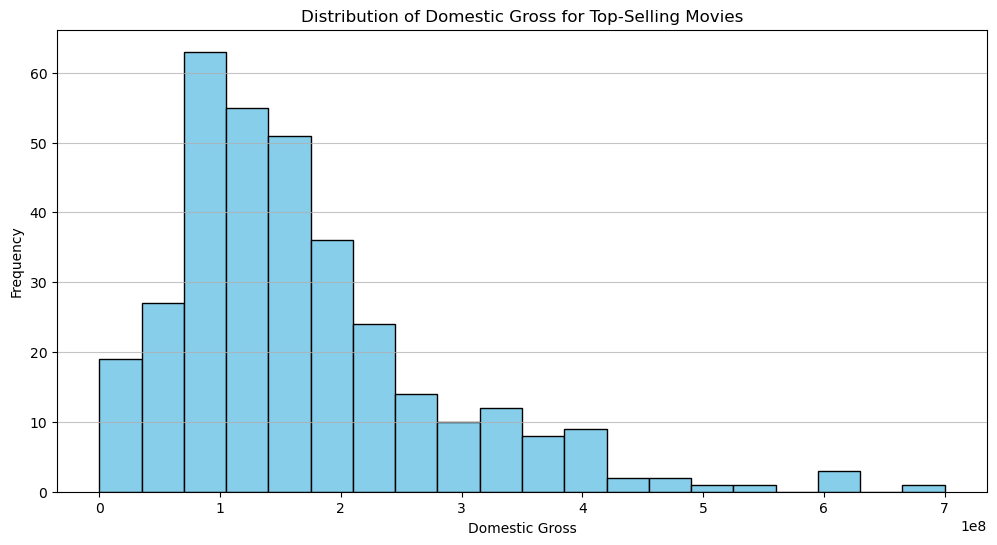

In [97]:
plt.figure(figsize=(12, 6))
plt.hist(top_10_percent['domestic_gross'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Domestic Gross for Top-Selling Movies')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/D

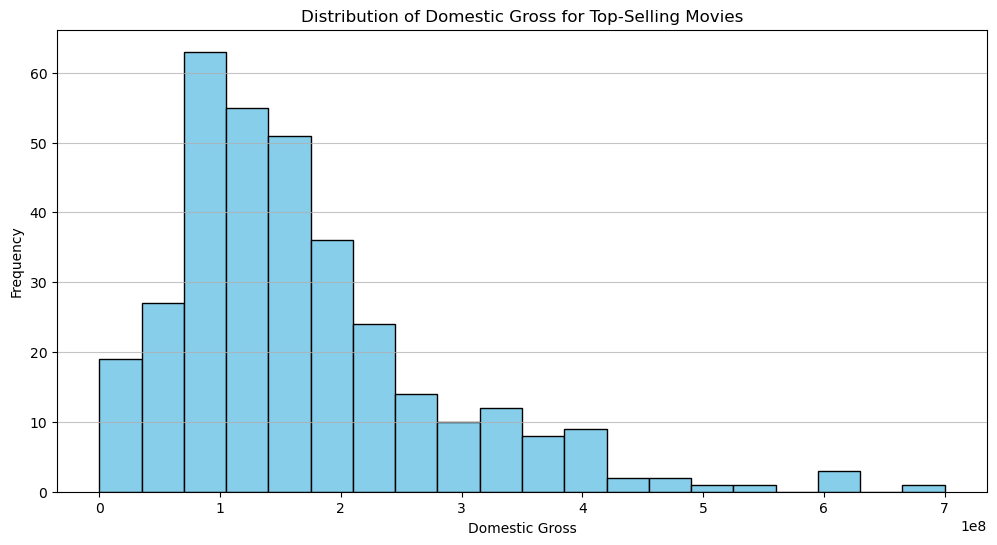

In [ ]:


# Convert 'foreign_gross' to numeric, errors='coerce' to handle non-numeric values
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Calculate total gross (domestic + foreign)
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

# Filter for the top 10% best-selling movies by total gross
top_10_percent = df.nlargest(int(len(df) * 0.1), 'total_gross')

# Calculate mean, median, and mode of domestic gross for these movies
mean_domestic_gross = top_10_percent['domestic_gross'].mean()
median_domestic_gross = top_10_percent['domestic_gross'].median()
mode_domestic_gross = top_10_percent['domestic_gross'].mode()[0]

print('Mean Domestic Gross: $' + str(mean_domestic_gross))
print('Median Domestic Gross: $' + str(median_domestic_gross))
print('Mode Domestic Gross: $' + str(mode_domestic_gross))
plt.figure(figsize=(12, 6))
plt.hist(top_10_percent['domestic_gross'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Domestic Gross for Top-Selling Movies')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()